In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})


In [ ]:
songs_df = pd.read_csv("/Volumes/Macintosh HD – dane/GitHub/masters/first semester/Unsupervised Learning/article_2/songs_vectors.csv", index_col=0)

In [ ]:
column_names = songs_df.columns

In [ ]:
songs_df = songs_df.T

In [ ]:
# scaling data
sc = StandardScaler()
sc.fit(songs_df)
df_transformed = sc.transform(songs_df)

In [ ]:
df_transformed.shape

In [ ]:
# initialize PCA
pca = PCA()
df_pca = pca.fit_transform(df_transformed)

In [ ]:
# amount of explained variance
variance_pca = pca.explained_variance_ratio_

In [ ]:
# cumulative explained variance
cumulative_variance = np.cumsum(variance_pca)

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)
plt.bar(range(0, len(variance_pca)), 
        variance_pca, 
        alpha=0.5,
        align='center',
        label='Explained variance by each single principal component'
       
)
plt.step(range(0, len(variance_pca)),
        cumulative_variance,
        where='mid',
        label='Cumulative explained variance')
plt.xlabel('Principal component index', fontsize=15)
plt.ylabel('% of explained variance', fontsize=15)
plt.xlim(-0.3, 15)
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()

In [ ]:
# making PCA with 2 components
pca = PCA(n_components=2)
pca_2 = pca.fit_transform(df_transformed)
pca_df = pd.DataFrame(pca_2, columns = ['PC1', 'PC2'])

In [ ]:
pca_df.head()

In [ ]:
print("Explained variance with 2 components: {}%".format(np.round(np.sum(pca.explained_variance_ratio_) * 100, 2)))

In [ ]:
fix, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (15,8)
ax.scatter(pca_df['PC1'], 
            pca_df['PC2'])
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.xlim(-20, 25)
plt.ylim(-15, 25)

xax = pca_df['PC1']
yax = pca_df['PC2']
for i, txt in enumerate(column_names):

    not_to_move = ['ludacris', 'prince', 'patti-smith', 'michael-jackson', 'amy-winehouse', 'lin-manuel-miranda', 'disney', 'kanye-west']
    if txt not in not_to_move:
        ax.annotate(txt, (xax[i] - 0.3, yax[i] + 0.6))
        
    else:
         ax.annotate(txt, (xax[i], yax[i]))
    


In [31]:
a = songs_df['adele']
b = songs_df['nursery_rhymes']
similarity = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
similarity

In [33]:
songs_df = pd.read_csv("/Volumes/Macintosh HD – dane/GitHub/masters/first semester/Unsupervised Learning/article_2/songs_vectors.csv", index_col=0)

In [34]:
songs_df

,prince,dickinson,beatles,bob-dylan,bjork,johnny-cash,disney,janisjoplin,kanye,bob-marley,...,r-kelly,drake,britney-spears,bruce-springsteen,nicki-minaj,kanye-west,paul-simon,nickelback,eminem,bruno-mars
0,0.488899,-0.151497,0.866229,0.332050,0.464633,-0.052686,0.628423,1.015842,0.393763,0.855792,...,0.799079,0.404629,1.180542,0.407606,0.457071,0.121589,0.254363,0.492601,0.342824,1.013985
1,1.610341,0.748771,1.241061,1.255925,1.078212,1.197751,1.076042,0.849392,1.128111,0.946536,...,1.237406,1.262244,1.398354,1.339310,1.205130,1.069831,0.998072,1.366088,1.295770,1.322053
2,-1.936098,-1.636477,-2.377264,-1.891242,-2.123817,-2.158009,-1.888964,-2.310341,-2.193906,-2.262774,...,-2.352120,-2.181932,-2.494427,-2.476290,-2.033452,-2.097285,-2.303176,-2.186932,-2.072237,-2.356970
3,-0.821185,-0.192223,-0.816632,-0.467427,-0.406551,-0.025675,-0.709705,-1.149756,-0.394666,-0.309796,...,-0.881137,-0.501777,-1.125783,-0.479958,-0.329150,-0.649858,-0.553310,-0.386956,-0.240733,-0.748238
4,-0.371704,0.994015,-0.149797,0.647207,0.377207,0.430123,0.280071,-0.508992,0.116053,-0.125651,...,-0.039799,-0.022557,-0.342595,0.280042,-0.274202,-0.136441,0.717278,0.202165,-0.023635,-0.443886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.493059,-0.291954,-1.252576,-0.793673,-0.642873,-0.548541,-0.638050,-1.192136,-0.699784,-0.951727,...,-1.088211,-0.866636,-1.192166,-0.589690,-0.602087,-0.377834,-0.635343,-0.790784,-0.691271,-0.865328
296,0.522071,0.441203,0.393009,-0.061658,0.441511,0.044495,0.520668,0.859490,0.324131,0.460529,...,0.365115,0.185198,0.098396,0.172240,0.137928,0.215483,0.558434,-0.033671,0.217477,0.631482
297,1.234423,0.297694,1.530120,0.754371,0.821359,0.996710,1.127094,1.903543,1.380986,1.548932,...,1.836874,1.452400,2.122900,1.432235,1.827290,1.020568,1.159650,1.329938,1.440136,1.787147
298,-2.219106,-2.071717,-2.359582,-2.035150,-2.070417,-1.734162,-2.202337,-1.717645,-1.705081,-1.828241,...,-1.845270,-1.645657,-1.936949,-1.770404,-1.475431,-1.807916,-2.087821,-1.989501,-1.534161,-1.685631


In [35]:
cos_sim = np.dot(songs_df['dickinson'], songs_df['al-green']) / (np.linalg.norm(songs_df['dickinson'] * np.linalg.norm(songs_df['al-green'])))

In [36]:
cos_sim

0.8341450914028571

In [37]:
column_names[0]

'prince'

In [38]:
cos_sim = []
for column in column_names:
    a = songs_df[column]
    for i in column_names:
        b = songs_df[i]
        similarity = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
        cos_sim.append(similarity) 

In [39]:
cos_sim_matrix = np.reshape(cos_sim, (48, 48))

In [40]:
cos_sim_df = pd.DataFrame(cos_sim_matrix, index = column_names, columns = column_names)

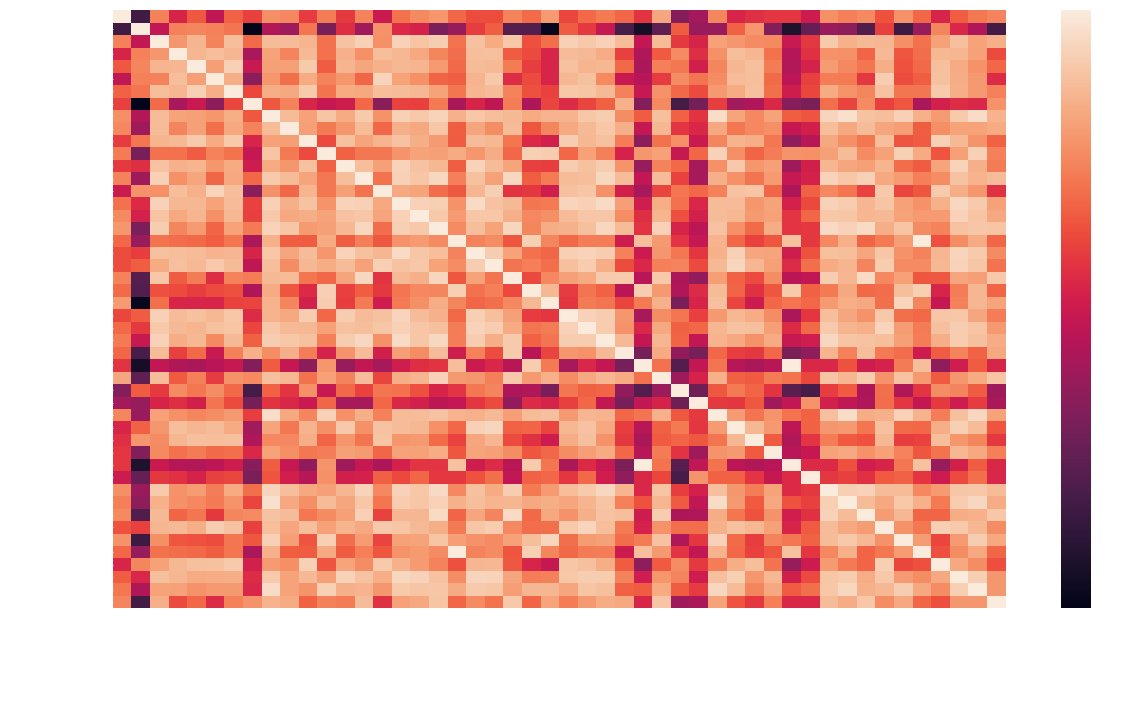

In [41]:
plt.rcParams["figure.figsize"] = (20,11)
fig = sns.heatmap(cos_sim_df)

In [42]:
similarities_with_artists = []
for column in column_names:
    a = songs_df[column]
    for i in column_names:
        b = songs_df[i]
        similarity = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
        similarities_with_artists.append([column, i, similarity]) 

In [43]:
similarities_with_artists

[['prince', 'prince', 0.9999999999999999],
 ['prince', 'dickinson', 0.8289102770801587],
 ['prince', 'beatles', 0.9453479245589446],
 ['prince', 'bob-dylan', 0.9037410201356254],
 ['prince', 'bjork', 0.9276630644531176],
 ['prince', 'johnny-cash', 0.8918946350029968],
 ['prince', 'disney', 0.9323318699231129],
 ['prince', 'janisjoplin', 0.9174809443159911],
 ['prince', 'kanye', 0.9523032538183632],
 ['prince', 'bob-marley', 0.9492319083552065],
 ['prince', 'leonard-cohen', 0.9158088800741234],
 ['prince', 'ludacris', 0.943620599512456],
 ['prince', 'adele', 0.9149409101105308],
 ['prince', 'alicia-keys', 0.9464745017527402],
 ['prince', 'joni-mitchell', 0.8962982211561598],
 ['prince', 'amy-winehouse', 0.9382609901177292],
 ['prince', 'lorde', 0.9501319184102682],
 ['prince', 'rihanna', 0.9552964850102447],
 ['prince', 'Kanye_West', 0.9344186971625015],
 ['prince', 'nirvana', 0.9230664688532066],
 ['prince', 'cake', 0.9233363673958958],
 ['prince', 'bieber', 0.9461398591622341],
 ['pri

In [44]:
similarities_df = pd.DataFrame(similarities_with_artists, columns = ['artist1', 'artist2', 'cosine_similarity']).reset_index()

In [45]:
similarities_df['cosine_similarity'] = np.round(similarities_df['cosine_similarity'], 7)

In [46]:
similarities_df = similarities_df[(similarities_df['cosine_similarity'] != 1) | (similarities_df['artist1'] != similarities_df['artist2'])]

In [47]:
top10 = similarities_df.sort_values(by='cosine_similarity', ascending=False).head(20).reset_index()

In [48]:
top10['index']

0      907
1     2082
2     1380
3     1756
4     1880
5      423
6      416
7     1544
8      430
9     2216
10    1904
11    1575
12    1937
13     856
14    1263
15     746
16     927
17     739
18    1941
19    1048
Name: index, dtype: int64

In [49]:
top10 = top10.iloc[::2, :]

In [50]:
top10['artist1_artist2'] = top10['artist1'] + ' and ' + top10['artist2']

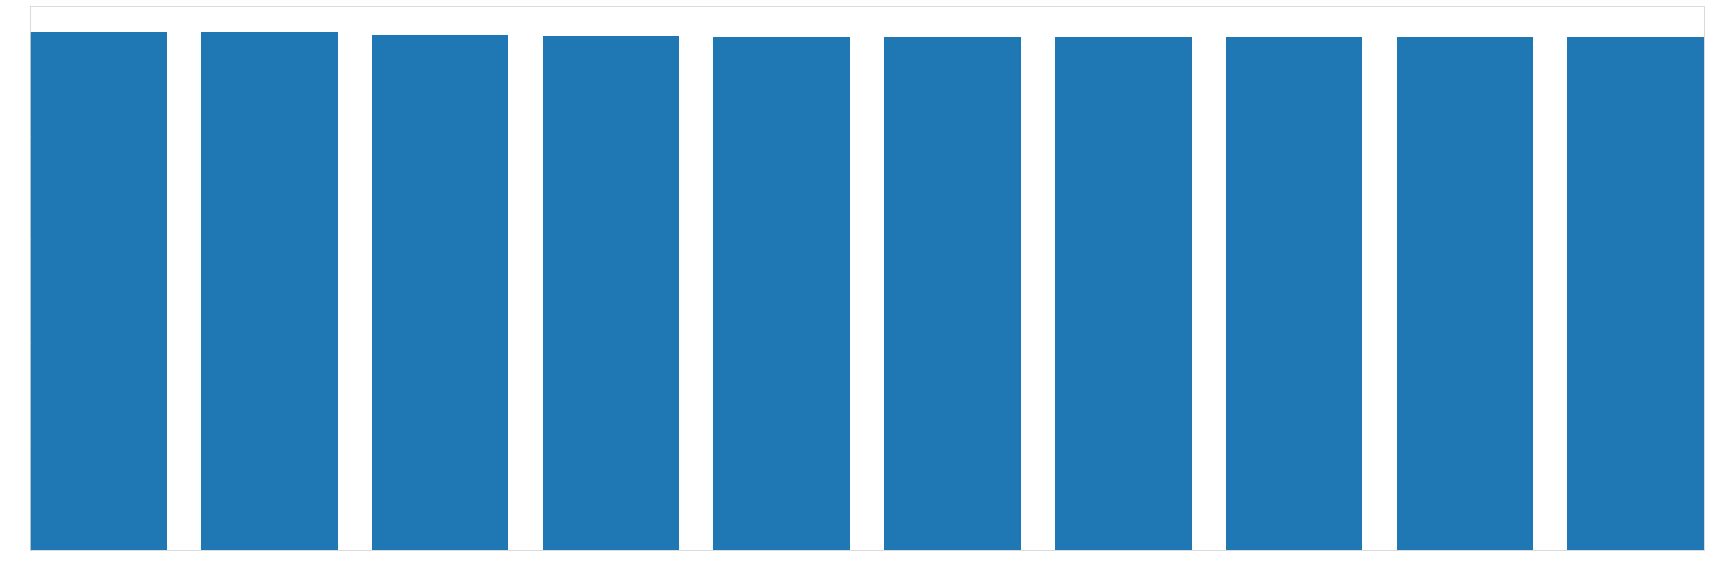

In [51]:
plt.rcParams["figure.figsize"] = (30,10)
fig = plt.bar(x='artist1_artist2', height='cosine_similarity', 
            data=top10,
            width = 0.8)
plt.margins(x=0)

In [52]:
bottom10 = similarities_df.sort_values(by='cosine_similarity', ascending=False).tail(20).reset_index()

In [53]:
bottom10 = bottom10.iloc[::2, :]

In [55]:
bottom10

,level_0,index,artist1,artist2,cosine_similarity,artist1_artist2
0,75,75,dickinson,al-green,0.834145,dickinson and al-green
2,1477,1477,lin-manuel-miranda,dr-seuss,0.833334,lin-manuel-miranda and dr-seuss
4,366,366,janisjoplin,lin-manuel-miranda,0.831733,janisjoplin and lin-manuel-miranda
6,95,95,dickinson,bruno-mars,0.830757,dickinson and bruno-mars
8,1,1,prince,dickinson,0.828910,prince and dickinson
10,2017,2017,nicki-minaj,dickinson,0.827543,nicki-minaj and dickinson
12,84,84,dickinson,Lil_Wayne,0.810339,dickinson and Lil_Wayne
14,1345,1345,lil-wayne,dickinson,0.805703,lil-wayne and dickinson
16,1105,1105,missy-elliott,dickinson,0.797377,missy-elliott and dickinson
18,337,337,janisjoplin,dickinson,0.794100,janisjoplin and dickinson


In [56]:
bottom10['artist1_artist2'] = bottom10['artist1'] + ' and ' + bottom10['artist2']

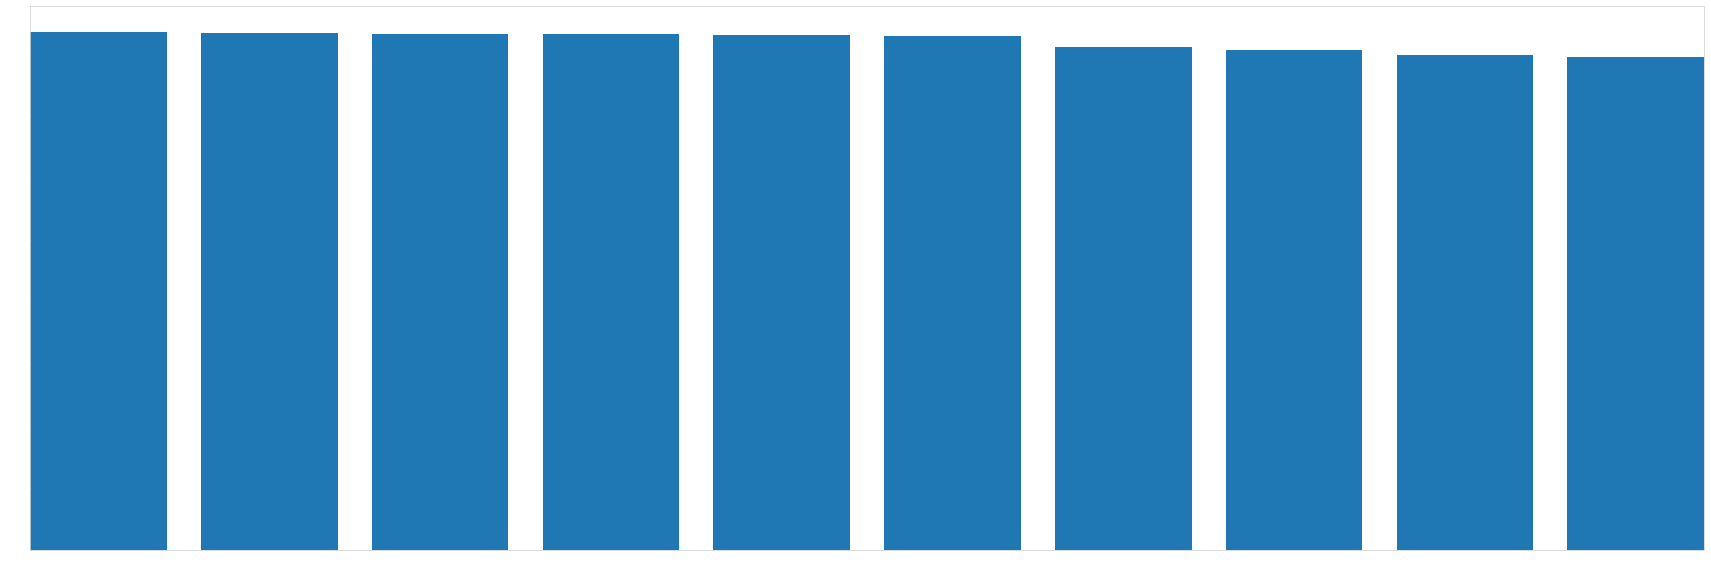

In [57]:
plt.rcParams["figure.figsize"] = (30,10)
fig = plt.bar(x='artist1_artist2', height='cosine_similarity', 
            data=bottom10,
            width = 0.8)
plt.margins(x=0)